Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, 
which accounts for 31% of all deaths worldwide. Heart failure is a common event caused by CVDs. 
This dataset contains 12 features that can be used to predict mortality by heart failure.

Here, task is to create a machine learning model which can predict the mortality by heart faliure based on some health conditions.

Data dictionary :
The meaning of each column in the data as below

age : age

anaemia : Decrease of red blood cells or hemoglobin (boolean)

creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)

diabetes : If the patient has diabetes (boolean)

ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure : If the patient has hypertension (boolean)

platelets : Platelets in the blood (kiloplatelets/mL)

serum_creatinine : Level of serum creatinine in the blood (mg/dL)

serum_sodium : Level of serum sodium in the blood (mEq/L)

sex : Woman or man (binary)

smoking : If the patient smokes or not (boolean)

time : Follow-up period (days)

DEATH_EVENT : If the patient deceased during the follow-up period (boolean) ---> Target Variable


Data source : https://www.kaggle.com/

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('C:\\Users\\Jaysree\\OneDrive\\kaggle\\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
data.info()
# 299 entries
# 12 columns
# no missing values in any column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [7]:
# print(data['age'].unique()) - continuous
print('anaemia')
print(data['anaemia'].unique()) #categorical

# print(data['creatinine_phosphokinase'].unique()) - continuous
print('\n')
print('diabetes')
print(data['diabetes'].unique()) #categorical

# print('ejection_fraction')
# print(data['ejection_fraction'].unique()) -continuous
print('\n')
print('high_blood_pressure')
print(data['high_blood_pressure'].unique()) #categorical
# print('\n')
# print(data['platelets'].unique()) -continuous
# print('\n')
# print(data['serum_creatinine'].unique()) -continuous

# print(data['serum_sodium'].unique()) - continuous
print('\n')
print('sex')
print(data['sex'].unique())  #categorical

print('\n')
print('smoking')
print(data['smoking'].unique()) #categorical
# print('\n')
print('\n')
# print(data['time'].unique()) - continuous
print('DEATH_EVENT')
print(data['DEATH_EVENT'].unique())  #categorical

anaemia
[0 1]


diabetes
[0 1]


high_blood_pressure
[1 0]


sex
[1 0]


smoking
[0 1]


DEATH_EVENT
[1 0]


In [8]:
categorical_features= ['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']
print('categorical_features : ', categorical_features)
continuous_features=['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium',  'time']
print('continuous_features : ', continuous_features)
target_variable='DEATH_EVENT'
print('targer variable : ', target_variable)

categorical_features :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']
continuous_features :  ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
targer variable :  DEATH_EVENT


In [9]:
# summary statistics for numerical variables
data.describe().T

# average age is around 60 years, with min 40 years and maximum 95 years

# # creatinine_phosphokinase (some enzyme present in blood and measured in mcg/L which is Micrograms per litre)
# average of this is 581 mcg/L with minimum being 23.0 and max being 7861.0

# ejection_fraction (percentage of blood leaving the heart at each contraction)
# average percentage is 38% with min being 14% and max being 80%

# platelets (platelets in blood (kiloplatelets/ML))
# average being 263358.029264 with min being 25100.0 and max being 850000.0 kiloplatelets

# serum_creatinine (level of serum_creatinine in blood (milligrams (mg) per deciliter (dL)))
# average being 1.393880 with min being 0.5 and max being 9.4 kiloplatelets

# serum_sodium (level of serum sodium in the blood (mEg/L))
# average being 136.625418 with min being 113.0 and max being 148.0 kiloplatelets

# time(follow-up period) (days)
# average being 130 days with min 4 days and max 285 days


,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# univariate analysis - categorical variable

In [10]:
# as the target variable is categorical will look into that first
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='DEATH_EVENT'>

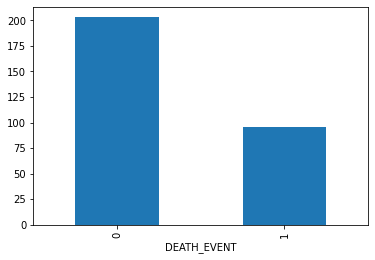

In [11]:
GroupedData= data.groupby('DEATH_EVENT').size()
GroupedData.plot(kind='bar')

# univariate analysis of all categorical variables

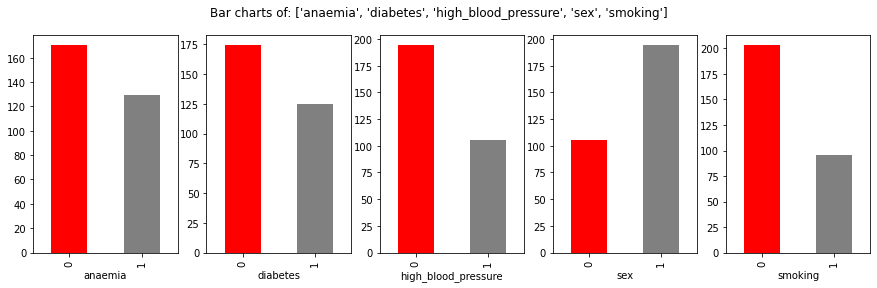

In [12]:
def PlotBarCharts(inpdata, colstoplot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    #generating subplots
    fig, subplot=plt.subplots(nrows=1,ncols=len(colstoplot), figsize=(15,4))
    fig.suptitle('Bar charts of: '+ str(colstoplot))
    
    for colName,plotNumber in zip(colstoplot,range(len(colstoplot))):
        inpdata.groupby(colName).size().plot(kind='bar',color=['red','grey'], ax=subplot[plotNumber])
        
        
PlotBarCharts(inpdata=data, colstoplot= ['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking'])

# univariate analysis for all continuous variables

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'ejection_fraction'}>],
       [<AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>,
        <AxesSubplot:title={'center':'serum_sodium'}>],
       [<AxesSubplot:title={'center':'time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

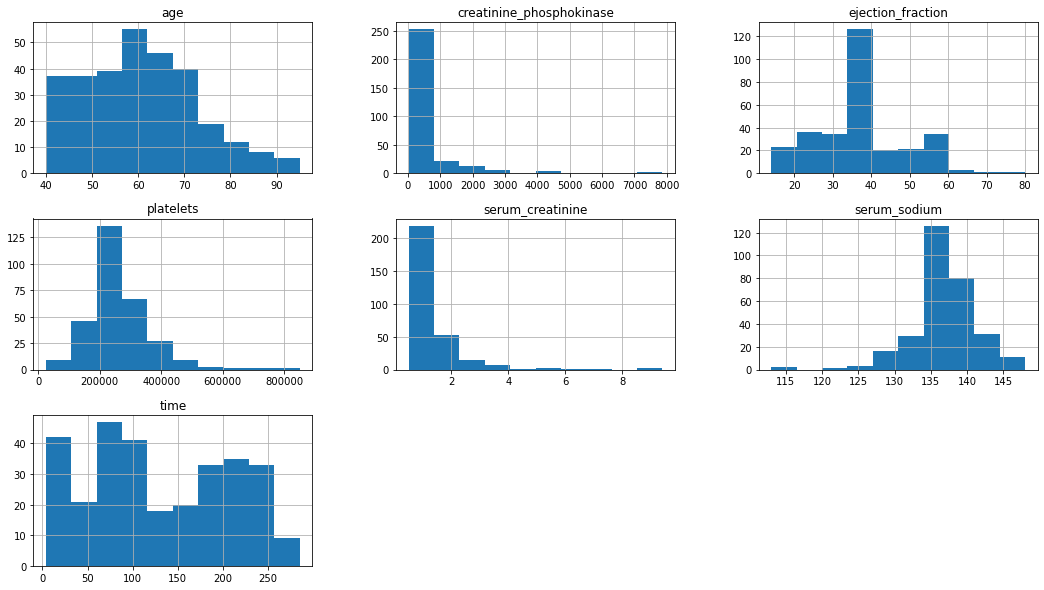

In [13]:
data.hist(['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium',  'time'], figsize=(18,10))


### all columns selected but creatinine_phosphokinase, serum_creatinine are right skewed
### outlier treatment needs to be done

# detecting outliers in continuous variables

#### creating a user defined function to detect outliers in all continuous predictors using IQR method

In [14]:
import pandas as pd
import numpy as np

def detect_outliers_iqr(df):
    outliers = {}
    outliers_count = {}
    
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            data = df[column]
            outliers[column] = []
            outliers_count[column] = 0 
            
            data = data.dropna()  # Drop NaN values
                
            data = sorted(data)
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            
            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5 * iqr)
            
            for value in data:
                if value < lower_bound or value > upper_bound:
                    outliers[column].append(value)
                    outliers_count[column] += 1   # Increment count for each outlier
    return outliers,outliers_count

In [15]:
outliers, outliers_count = detect_outliers_iqr(data[continuous_features])
print("Outliers:")
print(outliers)
print("\nOutliers Count:")
print(outliers_count)

Outliers:
{'age': [], 'creatinine_phosphokinase': [1380, 1419, 1548, 1610, 1688, 1767, 1808, 1820, 1846, 1876, 1896, 2017, 2060, 2261, 2281, 2334, 2413, 2442, 2522, 2656, 2695, 2794, 3964, 3966, 4540, 5209, 5882, 7702, 7861], 'ejection_fraction': [70, 80], 'platelets': [25100.0, 47000.0, 51000.0, 62000.0, 70000.0, 73000.0, 75000.0, 448000.0, 451000.0, 451000.0, 454000.0, 461000.0, 481000.0, 497000.0, 504000.0, 507000.0, 533000.0, 543000.0, 621000.0, 742000.0, 850000.0], 'serum_creatinine': [2.2, 2.3, 2.3, 2.3, 2.4, 2.4, 2.5, 2.5, 2.5, 2.7, 2.7, 2.7, 2.9, 3.0, 3.0, 3.2, 3.4, 3.5, 3.5, 3.7, 3.8, 4.0, 4.4, 5.0, 5.8, 6.1, 6.8, 9.0, 9.4], 'serum_sodium': [113, 116, 121, 124], 'time': []}

Outliers Count:
{'age': 0, 'creatinine_phosphokinase': 29, 'ejection_fraction': 2, 'platelets': 21, 'serum_creatinine': 29, 'serum_sodium': 4, 'time': 0}


In [16]:
# Create a new dictionary containing column names and outlier counts where count is not equal to 0
# this process is called dictionary comprehension 
# (reference link : https://www.geeksforgeeks.org/python-dictionary-comprehension/)
columns_without_outliers = {column: count for column, count in outliers_count.items() if count == 0}

print('columns without outliers : ',columns_without_outliers)
# do not need to treat these columns

columns without outliers :  {'age': 0, 'time': 0}


<AxesSubplot:>

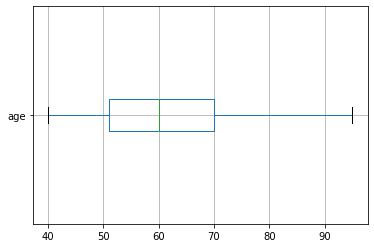

In [17]:
data.boxplot(column='age', vert=False)

<AxesSubplot:>

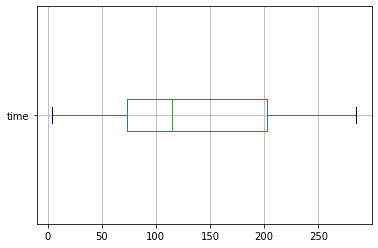

In [18]:
data.boxplot(column='time', vert=False)

#### do not have outliers in two predictors i.e., age, time. can use it as it is. But, need to treat the rest

# treating outliers of the continuous predictors

In [19]:
# Create a new dictionary containing column names and outlier counts where count is not equal to 0
columns_with_outliers = {column: count for column, count in outliers_count.items() if count != 0}

print('columns with outliers : ',columns_with_outliers)

columns with outliers :  {'creatinine_phosphokinase': 29, 'ejection_fraction': 2, 'platelets': 21, 'serum_creatinine': 29, 'serum_sodium': 4}


In [20]:
outliers_to_treat=['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine',
                                'serum_sodium']
outliers_to_treat=pd.DataFrame(data[outliers_to_treat])
outliers_to_treat.head()

,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,582,20,265000.00,1.9,130
1,7861,38,263358.03,1.1,136
2,146,20,162000.00,1.3,129
3,111,20,210000.00,1.9,137
4,160,20,327000.00,2.7,116


#### creating a new dataframe to have the updated values and not to disturn the original value

In [21]:
updated_data=data
updated_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### creating a user defined funtion to treat the outliers using capping and flooring method

In [22]:
def outlier_treatment(df):
    new = {}  # Initialize a dictionary to store outlier-treated values for each column
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            data = df[column]
            new[column] = []
            
            data = data.dropna()  # Drop NaN values
            
            tenth_percentile = np.percentile(data, 10)
            ninetieth_percentile = np.percentile(data, 90)
            
            for value in data:
                if value < tenth_percentile:
                    value = tenth_percentile
                    new[column].append(value)
                elif value > ninetieth_percentile:
                    value = ninetieth_percentile
                    new[column].append(value)
                elif value >= tenth_percentile and value <= ninetieth_percentile:
                    new[column].append(value)
    
    # Create a DataFrame from the new dictionary and return it
    return pd.DataFrame(new)

In [23]:
post_treatment_data=outlier_treatment(outliers_to_treat)
print(post_treatment_data.columns)
print(post_treatment_data.head())

Index(['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium'],
      dtype='object')
   creatinine_phosphokinase  ejection_fraction  platelets  serum_creatinine  \
0                     582.0               25.0  265000.00               1.9   
1                    1203.8               38.0  263358.03               1.1   
2                     146.0               25.0  162000.00               1.3   
3                     111.0               25.0  210000.00               1.9   
4                     160.0               25.0  327000.00               2.1   

   serum_sodium  
0         132.0  
1         136.0  
2         132.0  
3         137.0  
4         132.0  


#### replacing the values in the updated dataset after treating outliers

In [24]:
updated_data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']]=post_treatment_data[['creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium']]

In [25]:
outliers, outliers_count = detect_outliers_iqr(updated_data[continuous_features])
print("Outliers:")
print(outliers)
print("\nOutliers Count:")
print(outliers_count)

Outliers:
{'age': [], 'creatinine_phosphokinase': [], 'ejection_fraction': [], 'platelets': [], 'serum_creatinine': [], 'serum_sodium': [], 'time': []}

Outliers Count:
{'age': 0, 'creatinine_phosphokinase': 0, 'ejection_fraction': 0, 'platelets': 0, 'serum_creatinine': 0, 'serum_sodium': 0, 'time': 0}


#### we do not have outliers or any missing values in any of the continuous predictors anymore

# Making categorical variables ML model ready

In [26]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [27]:
unique_values = {col: updated_data[col].unique() for col in categorical_features}
unique_values

{'anaemia': array([0, 1], dtype=int64),
 'diabetes': array([0, 1], dtype=int64),
 'high_blood_pressure': array([1, 0], dtype=int64),
 'sex': array([1, 0], dtype=int64),
 'smoking': array([0, 1], dtype=int64)}

#### as all the categorical values are having 0 or 1 as their values, we do not need to treat anything here

# bivariate analysis

In [28]:
continuous_features

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

In [29]:
data['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

### relationship exploration (categorical target variable vs continuous predictors [box plot])

In [30]:
import matplotlib.pyplot as plt

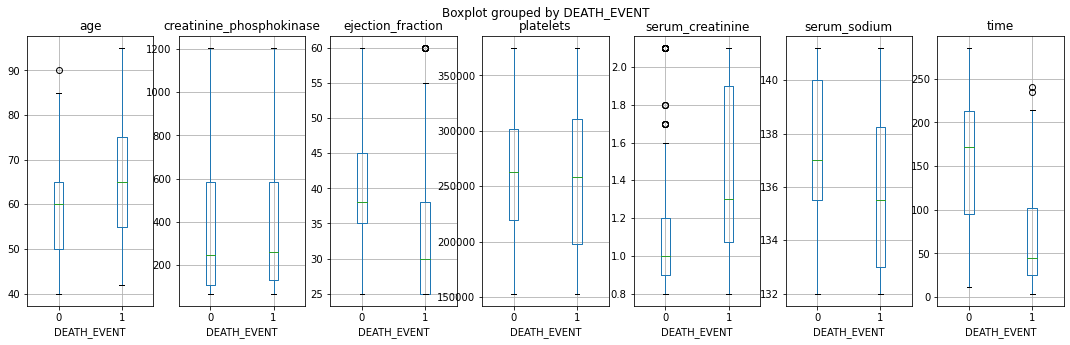

In [31]:
# Box plots for Categorical Target Variable "Rating" and continuous predictors

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(continuous_features), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Rating"
for PredictorCol , i in zip(continuous_features, range(len(continuous_features))):
    updated_data.boxplot(column=PredictorCol, by='DEATH_EVENT', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [32]:
target_variable

'DEATH_EVENT'

# ANOVA TEST

In [33]:
def functionAnova(inpdata,target_variable,continuous_predictor_list):
    from scipy.stats import f_oneway
    
    #creating empty list of final selected preditor
    SelectedPredictor = []
    NotSelectedPredictor=[]
    
    print('### ANOVA RESULTS ###  \n')
    
    for predictor in continuous_predictor_list:
        categorygrouplist= inpdata.groupby(target_variable)[predictor].apply(list)
        AnovaResults=f_oneway(*categorygrouplist)
        
        if (AnovaResults[1]<0.05):
            print(predictor, ' is correlated with ',target_variable, '|P-value:', AnovaResults[1])
            SelectedPredictor.append(predictor)
        
        else:
            print(predictor, ' is not correlated with ', target_variable, '|P-value:', AnovaResults[1])
            NotSelectedPredictor.append(predictor)
            
    print('\nSelected :', SelectedPredictor)
    print('Not selected :', NotSelectedPredictor)
    #return (SelectedPredictor, NotSelectedPredictor)

In [34]:
functionAnova(inpdata=updated_data, target_variable='DEATH_EVENT',continuous_predictor_list=continuous_features)


### ANOVA RESULTS ###  

age  is correlated with  DEATH_EVENT |P-value: 8.916762946533792e-06
creatinine_phosphokinase  is not correlated with  DEATH_EVENT |P-value: 0.9145714794980525
ejection_fraction  is correlated with  DEATH_EVENT |P-value: 1.5980908360922697e-05
platelets  is not correlated with  DEATH_EVENT |P-value: 0.5253974908754828
serum_creatinine  is correlated with  DEATH_EVENT |P-value: 1.6450679843063498e-12
serum_sodium  is correlated with  DEATH_EVENT |P-value: 0.0001753632202723875
time  is correlated with  DEATH_EVENT |P-value: 9.122223384926926e-23

Selected : ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
Not selected : ['creatinine_phosphokinase', 'platelets']


In [35]:
selected_continuous_predictors=pd.DataFrame(updated_data[['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']])
selected_continuous_predictors.head()

,age,ejection_fraction,serum_creatinine,serum_sodium,time
0,75.0,25.0,1.9,132.0,4
1,55.0,38.0,1.1,136.0,6
2,65.0,25.0,1.3,132.0,7
3,50.0,25.0,1.9,137.0,7
4,65.0,25.0,2.1,132.0,8


In [36]:
def chi2testfunction(inpdata,target_variable,categoricalcolslist):
    selected_predictors=[]
    not_selected_predictors=[]
    
    for predictor in categoricalcolslist:
        from scipy.stats import chi2_contingency
        crosstab_result=pd.crosstab(index=inpdata[predictor], columns=target_variable)
        chi2_result=chi2_contingency(crosstab_result)
        
        if chi2_result[1]<0.05:
            print(predictor, ' is correlated with ', target_variable, '| P-value : ', chi2_result[1])
            selected_predictors.append(predictor)
        else:
            print(predictor, ' is not correlated with ', target_variable, '| P-value : ', chi2_result[1])
            not_selected_predictors.append(predictor)
            
    print('\nselected : ', selected_predictors)
    print('not selected : ', not_selected_predictors)
    

In [37]:
chi2testfunction(inpdata=updated_data,target_variable=target_variable,categoricalcolslist=categorical_features)

anaemia  is not correlated with  DEATH_EVENT | P-value :  1.0
diabetes  is not correlated with  DEATH_EVENT | P-value :  1.0
high_blood_pressure  is not correlated with  DEATH_EVENT | P-value :  1.0
sex  is not correlated with  DEATH_EVENT | P-value :  1.0
smoking  is not correlated with  DEATH_EVENT | P-value :  1.0

selected :  []
not selected :  ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']


we have only final continuous predictors as predictors as all the categorical predictors are not having 
any relation with the target variable.

In [38]:
final_predictors=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
final_predictors

['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']

# splitting the data into Training and testing sample

In [39]:
x=updated_data[final_predictors].values
y=updated_data[target_variable].values

 #### splitting the data into training and testing set

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=101)

print(y_test.shape)

(90,)


# standardization/normalization of data

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# standard_PredictorScalar=StandardScaler()
minmax_PredictorScalar = MinMaxScaler()

# standard_PredictorScalarFit=standard_PredictorScalar.fit(x)
minmax_PredictorScalarFit= minmax_PredictorScalar.fit(x)
# having more accuracy in minmax so choosing that one
x=minmax_PredictorScalarFit.transform(x)
print(x)

[[0.63636364 0.         0.84615385 0.         0.        ]
 [0.27272727 0.37142857 0.23076923 0.43478261 0.00711744]
 [0.45454545 0.         0.38461538 0.         0.01067616]
 ...
 [0.09090909 1.         0.         0.65217391 0.97508897]
 [0.09090909 0.37142857 0.46153846 0.86956522 0.98220641]
 [0.18181818 0.57142857 0.61538462 0.43478261 1.        ]]


In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3, random_state=101)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
x_train

(209, 5)
(209,)
(90, 5)
(90,)


array([[0.45454545, 0.71428571, 0.15384615, 0.86956522, 0.08896797],
       [0.27272727, 0.37142857, 0.23076923, 0.43478261, 0.00711744],
       [0.41818182, 1.        , 0.38461538, 1.        , 0.36654804],
       ...,
       [0.45454545, 1.        , 0.        , 0.86956522, 0.26690391],
       [0.09090909, 0.28571429, 0.15384615, 1.        , 0.20284698],
       [0.4       , 0.        , 0.07692308, 0.86956522, 0.02135231]])

# logistic regression

In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [44]:
# choose parameter penalty=l1 and c=1
logistic_regression_model= LogisticRegression(C=1,penalty='l1', solver='saga')
print(logistic_regression_model)

# creating the model on training data
logistic_regression=logistic_regression_model.fit(x_train,y_train)
logistic_regression_prediction=logistic_regression.predict(x_test)

# measuring accuracy
from sklearn import metrics
print(metrics.classification_report(y_test,logistic_regression_prediction))
print(metrics.confusion_matrix(y_test,logistic_regression_prediction))

LogisticRegression(C=1, penalty='l1', solver='saga')
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        62
           1       0.85      0.79      0.81        28

    accuracy                           0.89        90
   macro avg       0.88      0.86      0.87        90
weighted avg       0.89      0.89      0.89        90

[[58  4]
 [ 6 22]]


In [45]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, logistic_regression_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
logistic_regression_Accuracy_Values=cross_val_score(logistic_regression, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',logistic_regression_Accuracy_Values)
print('\nFinal Average Accuracy of the logistic_regression model:', round(logistic_regression_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.70300334 0.80542986 0.87037037 0.79365079 0.93121693 0.89858793
 0.85341615 0.89333333 0.648      0.56298381]

Final Average Accuracy of the logistic_regression model: 0.8


In [46]:
from sklearn.model_selection import GridSearchCV

logistic_regression_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Example values for the regularization strength parameter
    'penalty': ['l1','l2'],
     'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
}


logistic_regression_grid_search=GridSearchCV(logistic_regression, param_grid=logistic_regression_param_grid, cv=5, n_jobs=1, verbose=5)
logistic_regression_grid_search_result=logistic_regression_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=liblinear; total time=   0.0s
[CV 1/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..........C=0.001, penalty=l1, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..............C=0.001, penalty=l1, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..............C=0.001, penalty=l1,

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\mode

[CV 1/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ...............C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END .................C=0.01, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END ................C=0.01, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END ...............

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\mode

[CV 1/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 2/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 3/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 4/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 5/5] END ..............C=1, penalty=l2, solver=newton-cg; total time=   0.0s
[CV 1/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 2/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 3/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 4/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 5/5] END ..................C=1, penalty=l2, solver=lbfgs; total time=   0.0s
[CV 1/5] END ....................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ....................C=1, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ...............

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\mode

[CV 1/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV 2/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV 3/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV 4/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV 5/5] END ..................C=100, penalty=l2, solver=sag; total time=   0.0s
[CV 1/5] END .................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV 2/5] END .................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV 3/5] END .................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV 4/5] END .................C=100, penalty=l2, solver=saga; total time=   0.0s
[CV 5/5] END .................C=100, penalty=l2, solver=saga; total time=   0.0s


C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.6746806         nan        nan        nan 0.6746806  0.6746806
 0.6746806  0.6746806  0.6746806  0.6746806  0.6746806         nan
        nan        nan 0.6746806  0.6746806  0.6746806  0.6746806
 0.6746806  0.6746806  0.6746806         nan        nan        nan
 0.6746806  0.72253194 0.70348432 0.70348432 0.70348432 0.70348432
 0.81347271        nan        nan        nan 0.81835075 0.79442509
 0.79442509 0.79442509 0.79442509 0.79442509 0.81358885        nan
        nan        nan 0.81358885 0.81358885 0.81358885 0.81358885
 0.81358885 0.81358885 0.81358885        nan        nan        nan
 0.81358885 0.81358885 0.81358885 0.81358885 0.81358885 0.81358885]
  warnings.warn(


In [47]:
results=logistic_regression_grid_search_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,C,penalty,solver,accuracy
34,1.0,l1,saga,0.818351
59,100.0,l2,saga,0.813589
58,100.0,l2,sag,0.813589
57,100.0,l2,lbfgs,0.813589
56,100.0,l2,newton-cg,0.813589


Precision: Precision measures the proportion of true positive predictions (correctly predicted positive instances) out of all instances predicted as positive.

For class 0: Precision is 0.90, indicating that 90% of the instances predicted as class 0 were actually class 0.
For class 1: Precision is 0.81, indicating that 81% of the instances predicted as class 1 were actually class 1.

Recall (Sensitivity): Recall measures the proportion of true positive predictions out of all actual positive instances.

For class 0: Recall is 0.92, indicating that 92% of the actual class 0 instances were correctly predicted as class 0.
For class 1: Recall is 0.79, indicating that 79% of the actual class 1 instances were correctly predicted as class 1.

F1-score: F1-score is the harmonic mean of precision and recall, providing a balance between the two metrics. It's particularly useful when you have an uneven class distribution.

For class 0: F1-score is 0.91.
For class 1: F1-score is 0.80.
Support: The number of instances of each class in the actual data.

Accuracy: Overall accuracy of the model, which is the proportion of correctly predicted instances out of all instances.

Accuracy is 0.88, indicating that 88% of the instances were correctly classified.

Confusion Matrix:

The confusion matrix provides a tabular summary of the actual vs. predicted classes.

In the provided confusion matrix:

True Negative (TN): 57 instances were correctly predicted as class 0.
False Positive (FP): 5 instances were incorrectly predicted as class 1.
False Negative (FN): 6 instances were incorrectly predicted as class 0.
True Positive (TP): 22 instances were correctly predicted as class 1.

# Decision tree classification

In [48]:
from sklearn import tree
decision_tree_model=tree.DecisionTreeClassifier(max_depth=5,criterion='gini')
print(decision_tree_model)

decision_tree=decision_tree_model.fit(x_train,y_train)
decision_tree_prediction=decision_tree.predict(x_test)

from sklearn import metrics
print(metrics.classification_report(y_test,decision_tree_prediction))
print(metrics.confusion_matrix(y_test,decision_tree_prediction))

DecisionTreeClassifier(max_depth=5)
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        62
           1       0.77      0.82      0.79        28

    accuracy                           0.87        90
   macro avg       0.84      0.85      0.85        90
weighted avg       0.87      0.87      0.87        90

[[55  7]
 [ 5 23]]


In [49]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, decision_tree_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
decision_tree_Accuracy_Values=cross_val_score(decision_tree, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',decision_tree_Accuracy_Values)
print('\nFinal Average Accuracy of the decision_tree model:', round(decision_tree_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.87

Accuracy values for 10-fold Cross Validation:
 [0.16666667 0.77333333 0.8692185  0.8692185  0.83097989 0.80555556
 0.50638298 0.78012422 0.60416667 0.56298381]

Final Average Accuracy of the decision_tree model: 0.68


In [50]:
decision_tree_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

decision_tree_grid_search=GridSearchCV(decision_tree,param_grid=decision_tree_param_grid, cv=5,n_jobs=1,verbose=5)
decision_tree_grid_search_result=decision_tree_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................criterion=gini, max_depth=None; total time=   0.0s
[CV 2/5] END .................criterion=gini, max_depth=None; total time=   0.0s
[CV 3/5] END .................criterion=gini, max_depth=None; total time=   0.0s
[CV 4/5] END .................criterion=gini, max_depth=None; total time=   0.0s
[CV 5/5] END .................criterion=gini, max_depth=None; total time=   0.0s
[CV 1/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 2/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 3/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 4/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 5/5] END ....................criterion=gini, max_depth=5; total time=   0.0s
[CV 1/5] END ...................criterion=gini, max_depth=10; total time=   0.0s
[CV 2/5] END ...................criterion=gini, m

In [51]:
results=decision_tree_grid_search_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,criterion,max_depth,accuracy
1,gini,5.0,0.789779
2,gini,10.0,0.765854
3,gini,15.0,0.765854
5,entropy,5.0,0.761208
0,gini,NaN,0.760976


<AxesSubplot:>

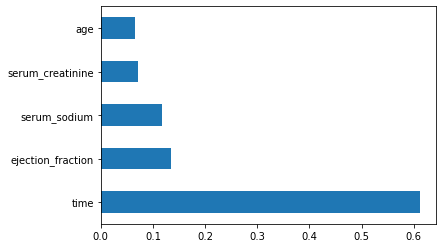

In [52]:
# plotting the feature importance
%matplotlib inline
feature_importance=pd.Series(decision_tree.feature_importances_, index=final_predictors)
feature_importance.nlargest(10).plot(kind='barh')

# Random forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None,random_state=101)
print(random_forest_model)

RandomForestClassifier(random_state=101)


In [54]:
random_forest=random_forest_model.fit(x_train,y_train)
random_forest_prediction=random_forest.predict(x_test)

In [55]:
from sklearn import metrics

print(metrics.classification_report(y_test,random_forest_prediction))
print(metrics.confusion_matrix(y_test,random_forest_prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        62
           1       0.76      0.68      0.72        28

    accuracy                           0.83        90
   macro avg       0.81      0.79      0.80        90
weighted avg       0.83      0.83      0.83        90

[[56  6]
 [ 9 19]]


In [56]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, random_forest_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
random_forest_Accuracy_Values=cross_val_score(random_forest, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',random_forest_Accuracy_Values)
print('\nFinal Average Accuracy of the random_forest model:', round(random_forest_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.16666667 0.80555556 0.87037037 0.93460925 0.89858793 0.83097989
 0.56024845 0.70909091 0.56       0.56298381]

Final Average Accuracy of the random_forest model: 0.69


In [57]:
random_forest_param_grid = {'n_estimators': [100,200,300,500,1000],
    'max_depth': [None, 5, 10, 15],
    'criterion': ['gini', 'entropy']
}

In [58]:
from sklearn.model_selection import GridSearchCV
random_forest_grid_search=GridSearchCV(random_forest,random_forest_param_grid,cv=5,n_jobs=1,verbose=5)
random_forest_grid_search_result=random_forest_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=100; total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=200; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, n_estimators=200; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, n_estimators=200; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=None, n_estimators=200; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, n_estimators=200; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, n_estimators=300; total time=   0.2s
[CV 2/5] END criterion=gini, max_dep

[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=100; total time=   0.0s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=100; total time=   0.0s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=100; total time=   0.0s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=100; total time=   0.0s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=200; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=200; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=200; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=None, n_estimators=200; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=None, n_estimators=200; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=None, n_estimators=300; total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=None, n_estimators=300; total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=None, n_estimators=300;

In [59]:
results=random_forest_grid_search_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,criterion,max_depth,n_estimators,accuracy
0,gini,NaN,100,0.842276
33,entropy,10.0,500,0.842276
15,gini,15.0,100,0.842276
10,gini,10.0,100,0.842276
14,gini,10.0,1000,0.837631


<AxesSubplot:>

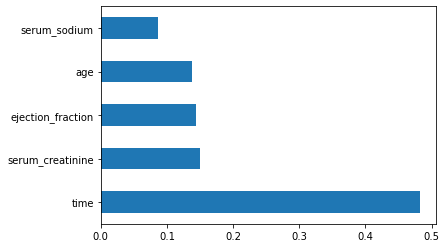

In [60]:
# plotting the feature importance
%matplotlib inline
feature_importance=pd.Series(random_forest.feature_importances_, index=final_predictors)
feature_importance.nlargest(10).plot(kind='barh')

# ADABOOST

In [61]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

DTC=tree.DecisionTreeClassifier(max_depth=2)
adaboost_model=AdaBoostClassifier(n_estimators=100, base_estimator=DTC, learning_rate=0.01)
print(adaboost_model)

# {'base_estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 0.01, 'n_estimators': 50}
# {'base_estimator': DecisionTreeClassifier(max_depth=1), 'learning_rate': 1, 'n_estimators': 10}

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=100)


In [62]:
adaboost=adaboost_model.fit(x_train,y_train)
adaboost_prediction= adaboost.predict(x_test)

In [63]:
from sklearn import metrics

print(metrics.classification_report(y_test,adaboost_prediction))
print(metrics.confusion_matrix(y_test,adaboost_prediction))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        62
           1       0.79      0.68      0.73        28

    accuracy                           0.84        90
   macro avg       0.83      0.80      0.81        90
weighted avg       0.84      0.84      0.84        90

[[57  5]
 [ 9 19]]


In [64]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, adaboost_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
adaboost_Accuracy_Values=cross_val_score(adaboost, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',adaboost_Accuracy_Values)
print('\nFinal Average Accuracy of the adboost model:', round(adaboost_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.16666667 0.93460925 0.96703297 0.93460925 0.96619598 0.64157119
 0.62597403 0.57647059 0.57647059 0.56298381]

Final Average Accuracy of the adboost model: 0.7


In [65]:
adaboost_param_grid = {
    'base_estimator': [tree.DecisionTreeClassifier(max_depth=1), tree.DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [10,50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

In [66]:
from sklearn.model_selection import GridSearchCV

adaboost_grid_search=GridSearchCV(adaboost, adaboost_param_grid,cv=5, n_jobs=1, verbose=5)
adaboost_grid_search_result=adaboost_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=10; total time=   0.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_estimators=50; total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.01, n_esti

[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV 4/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV 5/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=100; total time=   0.0s
[CV 1/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200; total time=   0.1s
[CV 2/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200; total time=   0.1s
[CV 3/5] END base_estimator=DecisionTreeClassifier(max_depth=2), learning_rate=0.01, n_estimators=200; total time=   0.1s
[CV 4/5] END base_estima

In [67]:
results=adaboost_grid_search_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,base_estimator,learning_rate,n_estimators,accuracy
14,DecisionTreeClassifier(max_depth=2),0.01,100,0.837282
13,DecisionTreeClassifier(max_depth=2),0.01,50,0.837282
12,DecisionTreeClassifier(max_depth=2),0.01,10,0.832636
3,DecisionTreeClassifier(max_depth=1),0.01,200,0.832636
2,DecisionTreeClassifier(max_depth=1),0.01,100,0.827758


<AxesSubplot:>

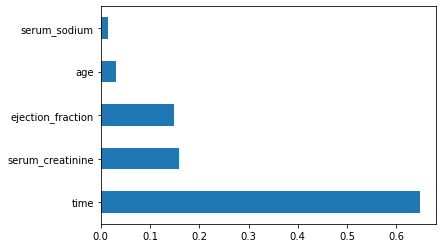

In [68]:
# plotting the feature importance
%matplotlib inline
feature_importance=pd.Series(adaboost.feature_importances_, index=final_predictors)
feature_importance.nlargest(10).plot(kind='barh')

# XGBOOST

In [69]:
from xgboost import XGBClassifier

xgboost_model=XGBClassifier(max_depth=6, learning_rate=0.3,n_estimators=10, objective='binary:logistic', booster='gbtree')
print(xgboost_model)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [70]:
xgboost=xgboost_model.fit(x_train,y_train)
xgboost_prediction=xgboost.predict(x_test)

In [71]:
from sklearn import metrics
print(metrics.classification_report(y_test,xgboost_prediction))
print(metrics.confusion_matrix(y_test, xgboost_prediction))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        62
           1       0.73      0.79      0.76        28

    accuracy                           0.84        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.85      0.84      0.85        90

[[54  8]
 [ 6 22]]


In [72]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, xgboost_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
xgboost_Accuracy_Values=cross_val_score(xgboost, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',xgboost_Accuracy_Values)
print('\nFinal Average Accuracy of the xgboost model:', round(xgboost_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.85

Accuracy values for 10-fold Cross Validation:
 [0.16666667 0.7724246  0.8692185  0.90246769 0.83744614 0.83744614
 0.525      0.57647059 0.62597403 0.56298381]

Final Average Accuracy of the xgboost model: 0.67


In [73]:
xgboost_param_grid = {
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [10,50, 100, 200]
}

In [74]:
from sklearn.model_selection import GridSearchCV

xgboost_grid_search_cv= GridSearchCV(xgboost, xgboost_param_grid, cv=5, n_jobs=1,verbose=5)
xgboost_grid_search_cv_result=xgboost_grid_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=10; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.01, ma

[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=50; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 4/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 5/5] END learning_rate=0.1, max_depth=9, n_estimators=100; total time=   0.0s
[CV 1/5] END learning_rate=0.1, max_depth=9, n_estimators=200; total time=   0.0s
[CV 2/5] END learning_rate=0.1, max_depth=9, n_estimators=200; total time=   0.0s
[CV 3/5] END learning_rate=0.1, max_depth=9, n_estimators=200; total time=   0.0s
[CV 4/5] END learnin

In [75]:
results=xgboost_grid_search_cv_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,learning_rate,max_depth,n_estimators,accuracy
28,0.30,6,10,0.847154
32,0.30,9,10,0.837515
7,0.01,6,200,0.837398
11,0.01,9,200,0.837398
14,0.10,3,100,0.832753


<AxesSubplot:>

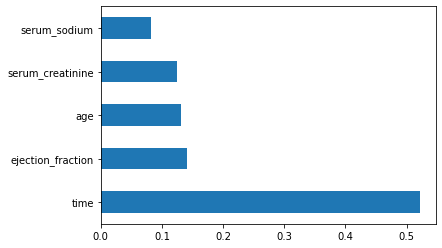

In [76]:
# plotting the feature importance
%matplotlib inline
feature_importance=pd.Series(xgboost.feature_importances_, index=final_predictors)
feature_importance.nlargest(10).plot(kind='barh')

# KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7)
 
#Printing all the parameters of KNN
print(knn_model)

KNeighborsClassifier(n_neighbors=7)


In [78]:
#Creating the model on Training Data
KNN=knn_model.fit(x_train,y_train)
knn_prediction=KNN.predict(x_test)

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [79]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, knn_prediction))
print(metrics.confusion_matrix(y_test, knn_prediction))
 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.68      0.61      0.64        28

    accuracy                           0.79        90
   macro avg       0.76      0.74      0.75        90
weighted avg       0.78      0.79      0.79        90

[[54  8]
 [11 17]]


In [80]:
# from sklearn.linear_model import LogisticRegression
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, knn_prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
knn_Accuracy_Values=cross_val_score(knn_model, x , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',knn_Accuracy_Values)
print('\nFinal Average Accuracy of the knn model:', round(knn_Accuracy_Values.mean(),2))

Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.70707071 0.77333333 0.8692185  0.75421797 0.8244414  0.72486772
 0.86136364 0.85341615 0.648      0.56298381]

Final Average Accuracy of the knn model: 0.76


C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [81]:
 knn_param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 15]}

In [82]:
from sklearn.model_selection import GridSearchCV

knn_grid_search_cv= GridSearchCV(KNN, knn_param_grid, cv=5, n_jobs=1, verbose=5)
knn_grid_search_result=knn_grid_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................................n_neighbors=3; total time=   0.0s


C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

[CV 2/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=3; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=4; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=5; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=5; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=5; total time=   0.0s
[CV 4/5] END ...............

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

[CV 4/5] END ..................................n_neighbors=6; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=6; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=7; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=7; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=7; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=7; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=7; total time=   0.0s
[CV 1/5] END ..................................n_neighbors=8; total time=   0.0s
[CV 2/5] END ..................................n_neighbors=8; total time=   0.0s
[CV 3/5] END ..................................n_neighbors=8; total time=   0.0s
[CV 4/5] END ..................................n_neighbors=8; total time=   0.0s
[CV 5/5] END ..................................n_neighbors=8; total time=   0.0s
[CV 1/5] END ...............

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

In [83]:
results=knn_grid_search_result.cv_results_
scores_and_params= pd.DataFrame(results['params'])
scores_and_params

scores_and_params['accuracy']=pd.DataFrame(results['mean_test_score'], columns=['accuracy'])
scores_and_params.sort_values(by= 'accuracy', ascending=False).head()

,n_neighbors,accuracy
4,7,0.789779
2,5,0.785134
6,9,0.780372
0,3,0.770732
5,8,0.765854


In [84]:
print('Final Average Accuracy of the logistic regression model:', round(logistic_regression_Accuracy_Values.mean(),2))
print('Final Average Accuracy of the decision tree model:', round(decision_tree_Accuracy_Values.mean(),2))
print('Final Average Accuracy of the random forest model:', round(random_forest_Accuracy_Values.mean(),2))
print('Final Average Accuracy of the adaboost model:', round(adaboost_Accuracy_Values.mean(),2))
print('Final Average Accuracy of the xgboost model:', round(xgboost_Accuracy_Values.mean(),2))
print('Final Average Accuracy of the knn model:', round(knn_Accuracy_Values.mean(),2))

Final Average Accuracy of the logistic regression model: 0.8
Final Average Accuracy of the decision tree model: 0.68
Final Average Accuracy of the random forest model: 0.69
Final Average Accuracy of the adaboost model: 0.7
Final Average Accuracy of the xgboost model: 0.67
Final Average Accuracy of the knn model: 0.76


logistic regression is having the highest accuracy. 

In [85]:
# choose parameter penalty=l1 and c=1
print(logistic_regression)

LogisticRegression(C=1, penalty='l1', solver='saga')


In [86]:
DataForML=updated_data[final_predictors]
DataForML['DEATH_EVENT']= updated_data[target_variable]
DataForML.head()

<ipython-input-86-2e0a3e573422>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataForML['DEATH_EVENT']= updated_data[target_variable]


,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,75.0,25.0,1.9,132.0,4,1
1,55.0,38.0,1.1,136.0,6,1
2,65.0,25.0,1.3,132.0,7,1
3,50.0,25.0,1.9,137.0,7,1
4,65.0,25.0,2.1,132.0,8,1


In [87]:
# training 100% data 
print('predictors : ', final_predictors)
print('target variable : ', [target_variable])
x=DataForML[final_predictors].values
y=DataForML[target_variable].values
print(x.shape)
print(y.shape)

predictors :  ['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
target variable :  ['DEATH_EVENT']
(299, 5)
(299,)


In [88]:
from sklearn.linear_model import LogisticRegression
reg_model= LogisticRegression(C=1,penalty='l1', solver='saga')
print(logistic_regression_model)

LogisticRegression(C=1, penalty='l1', solver='saga')


In [89]:
FinalLogisticRegressionModel=reg_model.fit(x,y)

C:\Users\Jaysree\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [90]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final Model
with open('FinalLogisticRegressionModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(FinalLogisticRegressionModel, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Jaysree\OneDrive\kaggle


In [91]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

In [92]:
# This Function can be called from any from any front end tool/website
def HeartFailurePrediction(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputDataDetails=InputData.append(DataForML)
    
    # Treating the binary nominal variables first
#     InputDataDetails['Married'].replace({'Yes':1, 'No':0}, inplace=True)
#     InputLoanDetails['Education'].replace({'Graduate':1, 'Not Graduate':0}, inplace=True)
    
    # Generating dummy variables for rest of the nominal variables
#     InputLoanDetails=pd.get_dummies(InputLoanDetails)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']
    
    # Generating the input values to the model
    X=InputDataDetails[Predictors].values[0:Num_Inputs]    
    
    # Generating the standardized values of X since it was done while model training also
    X=minmax_PredictorScalarFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('FinalLogisticRegressionModel.pkl', 'rb') as fileReadStream:
        Logistic_Regression_model=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=logistic_regression.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)